In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor
import numpy as np
from hyper_search import max_depth_search, learning_rate_search, max_features_search

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150


In [2]:
test_df = pd.read_csv('./DATA/winequality-red-test.csv')

wine_df = pd.read_csv('./DATA/winequality-red-train.csv')
wine_df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,805.058640,8.344566,0.525035,0.274707,2.465090,0.087077,15.940188,46.261142,0.996730,3.313049,0.657561,10.413305,5.666927
std,458.226479,1.742294,0.179988,0.192041,1.277385,0.044866,10.375507,33.358796,0.001828,0.152954,0.155208,1.071355,0.813670
min,1.000000,4.700000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990200,2.740000,0.370000,8.400000,3.000000
25%,414.000000,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995570,3.210000,0.560000,9.500000,5.000000
50%,808.000000,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996760,3.310000,0.630000,10.100000,6.000000
75%,1191.000000,9.400000,0.640000,0.430000,2.500000,0.090000,22.000000,60.000000,0.997810,3.410000,0.720000,11.000000,6.000000
max,1597.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
X = wine_df.iloc[:, 1:-1]
y = wine_df.quality

X_test = test_df.iloc[:, 1:-1]
y_test = test_df.quality

array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>,
        <AxesSubplot:>]], dtype=object)

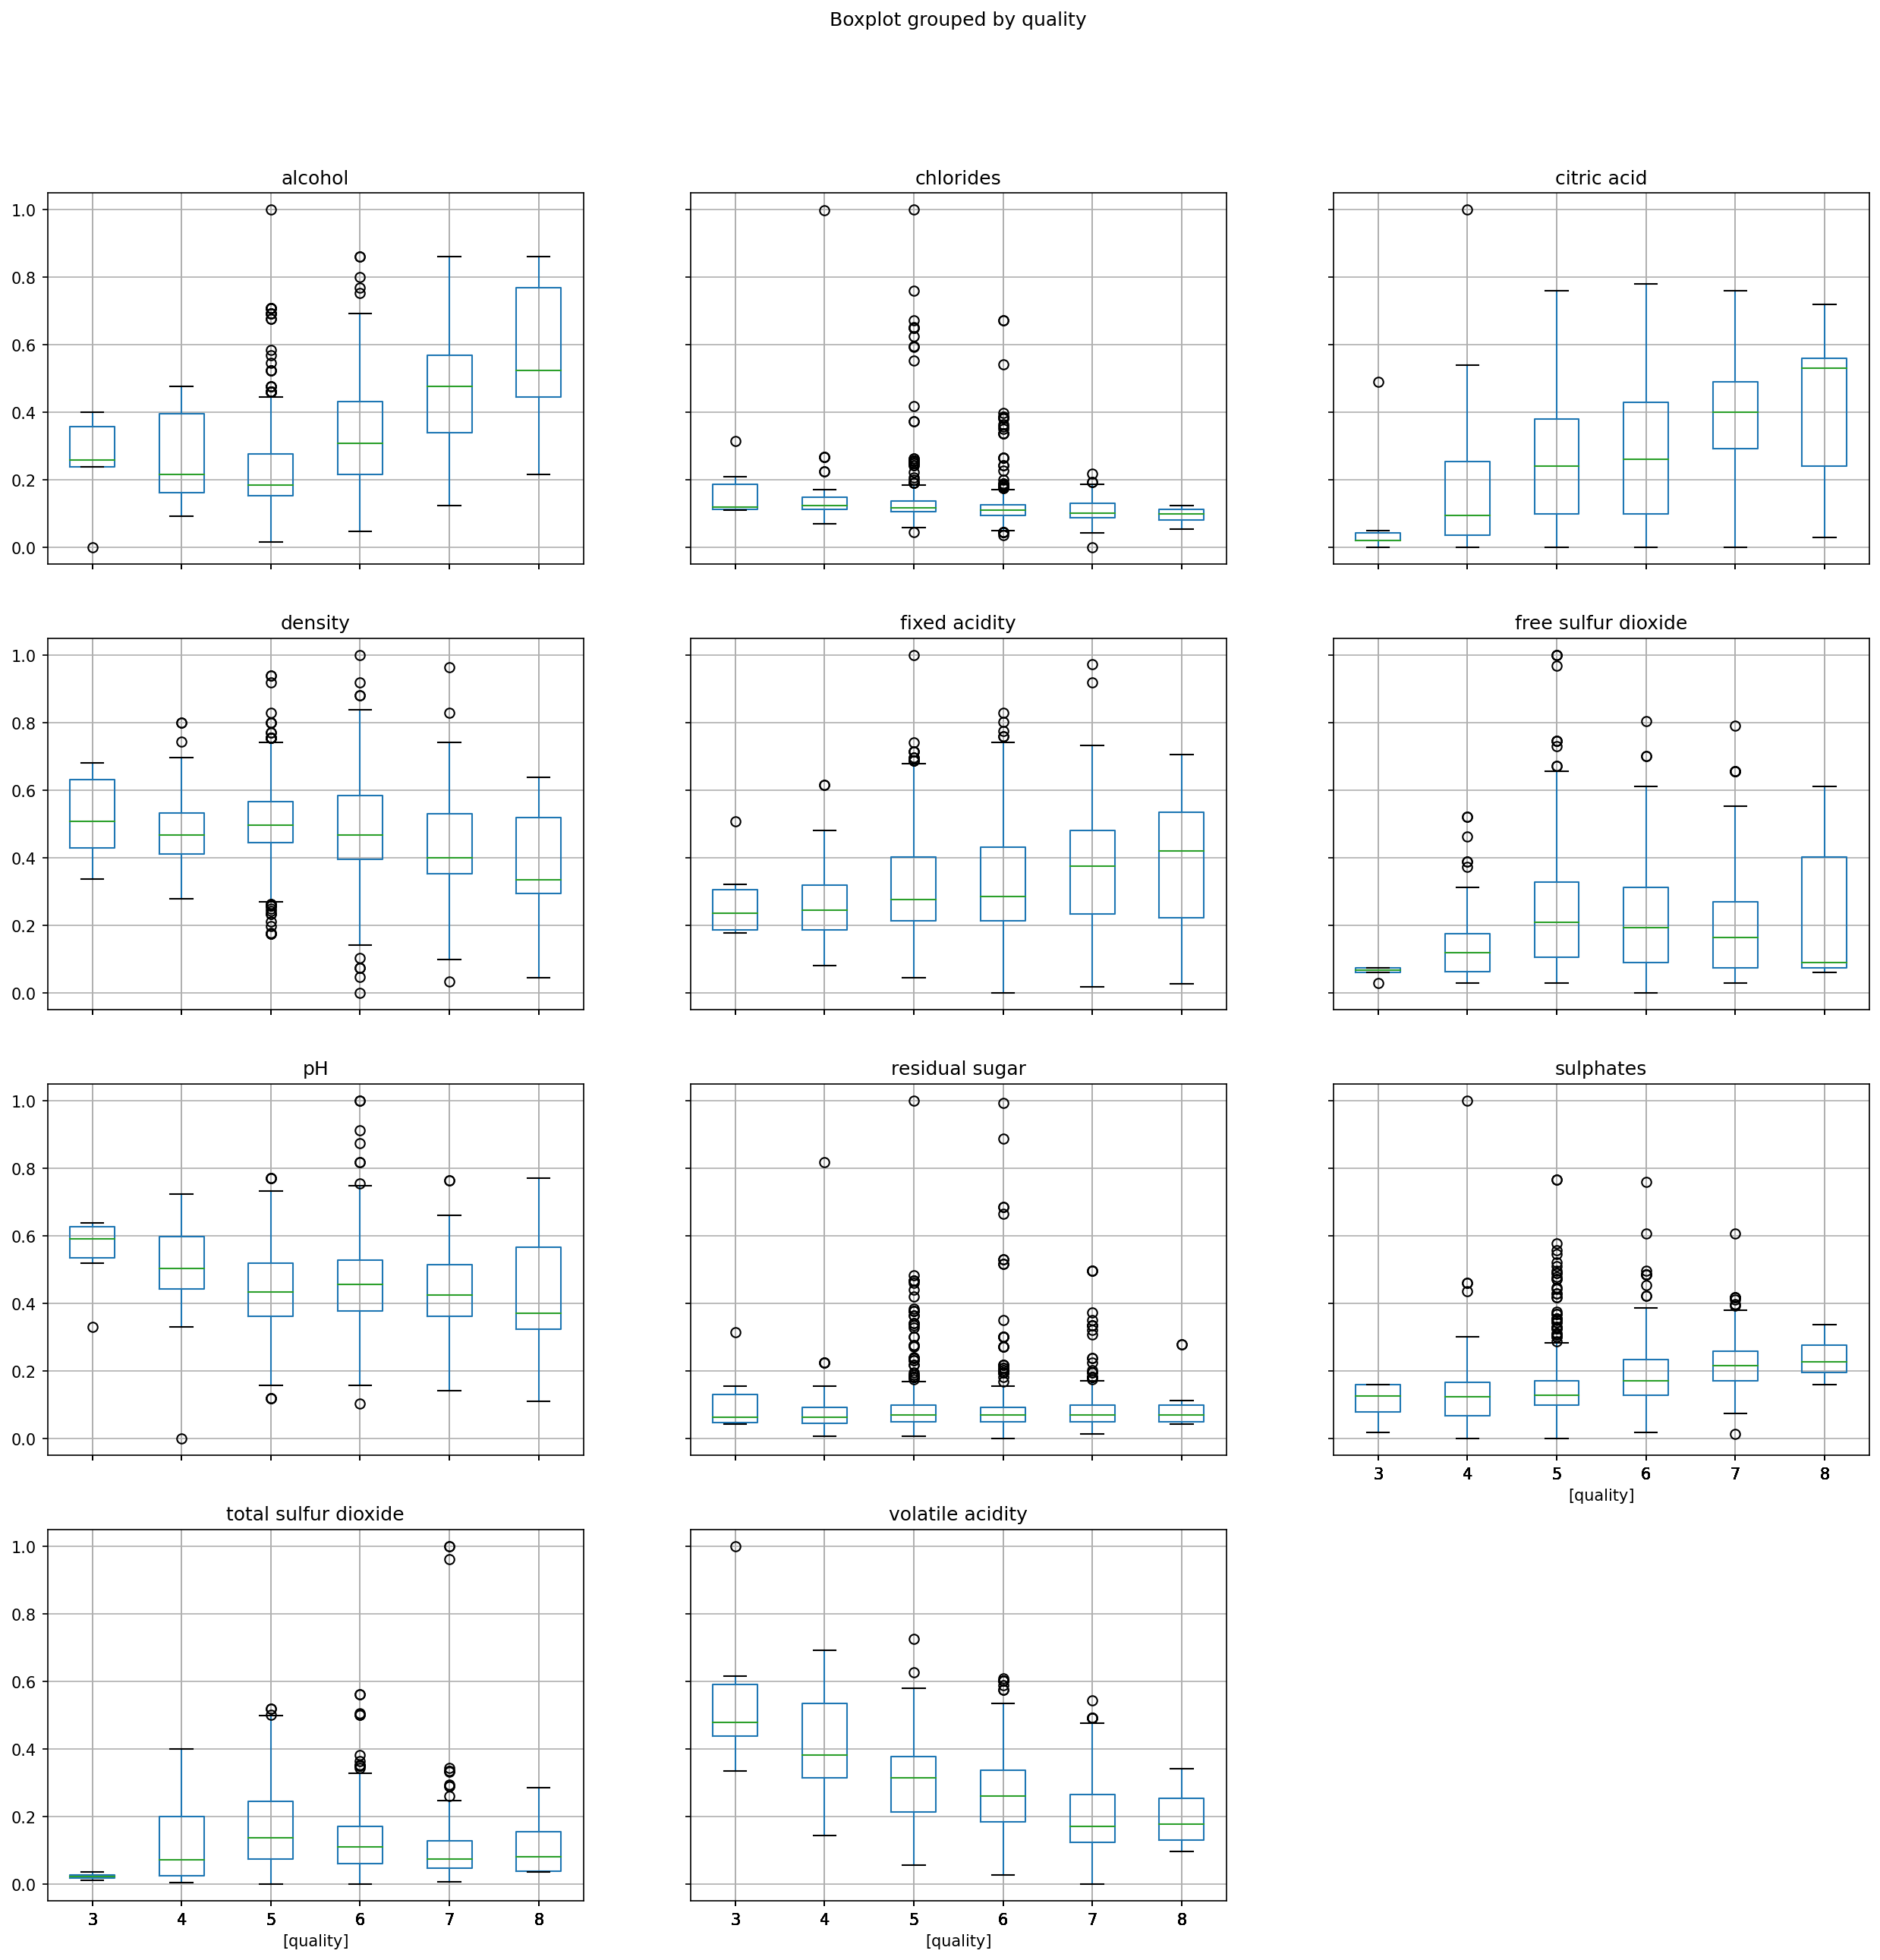

In [4]:
reg = (X-X.min())/(X.max()-X.min())
reg['quality'] = y

reg.boxplot(by ='quality', figsize = (20, 20))

## Preliminary Analysis
As we can see from the data, most qualities of our wine can give an indication of the score obtained by tasters (all aspects of acidity from PH to Volatile Acidity being seemingly important), however the wide spread around the average values indicate that none of them in isolation can be used as a particularly accurate predictor

In [5]:
RFR_max_depth, _ = max_depth_search(RandomForestRegressor, X, y, verbose= True)

max depth= 1 :
average accuracy: 0.5509765625
accuracy spread: 0.11328125
max depth= 3 :
average accuracy: 0.5828125
accuracy spread: 0.0859375
max depth= 6 :
average accuracy: 0.6830078125
accuracy spread: 0.08984375
max depth= 10 :
average accuracy: 0.774609375
accuracy spread: 0.08984375
max depth= None :
average accuracy: 0.8013671875
accuracy spread: 0.10546875

Best cycle:
Max depth= None
Accuracy= 0.8013671875


In [6]:
RFR = RandomForestRegressor(max_depth=RFR_max_depth)
RFR.fit(X,y)
y_hat = RFR.predict(X_test).round()
RFR_accuracy = np.mean(y_hat == y_test)
print('Test Accuracy: ', int(RFR_accuracy*100), '%')

Test Accuracy:  64 %


In [7]:
RFC_max_depth, _ = max_depth_search(RandomForestClassifier, X, y, verbose= True)

max depth= 1 :
average accuracy: 0.5626953125
accuracy spread: 0.11328125
max depth= 3 :
average accuracy: 0.598828125
accuracy spread: 0.09765625
max depth= 6 :
average accuracy: 0.705078125
accuracy spread: 0.1171875
max depth= 10 :
average accuracy: 0.7998046875
accuracy spread: 0.109375
max depth= None :
average accuracy: 0.824609375
accuracy spread: 0.0625

Best cycle:
Max depth= None
Accuracy= 0.824609375


In [8]:
RFC = RandomForestClassifier(max_depth=RFC_max_depth)
RFC.fit(X,y)
y_hat = RFC.predict(X_test).round()
RFC_accuracy = np.mean(y_hat == y_test)
print('Test Accuracy: ', int(RFC_accuracy*100), '%')

Test Accuracy:  67 %


In [9]:
ABC_learning_rate, _ = learning_rate_search(AdaBoostClassifier, X, y, verbose=True)

Learning Rate= 1 :
average accuracy: 0.5232421875
accuracy spread: 0.265625
Learning Rate= 0.3 :
average accuracy: 0.51796875
accuracy spread: 0.1953125
Learning Rate= 0.1 :
average accuracy: 0.541796875
accuracy spread: 0.1484375
Learning Rate= 0.03 :
average accuracy: 0.554296875
accuracy spread: 0.1015625
Learning Rate= 0.01 :
average accuracy: 0.5404296875
accuracy spread: 0.08203125

Best cycle:
Learning Rate= 0.03
Accuracy= 0.554296875


In [10]:
ABC = AdaBoostClassifier(learning_rate=ABC_learning_rate)
ABC.fit(X,y)
y_hat = ABC.predict(X_test).round()
ABC_accuracy = np.mean(y_hat == y_test)
print('Test Accuracy: ', int(ABC_accuracy*100), '%')

Test Accuracy:  57 %


In [11]:
ABR_learning_rate, _ = learning_rate_search(AdaBoostRegressor, X, y, verbose=True)

Learning Rate= 1 :
average accuracy: 0.56328125
accuracy spread: 0.1171875
Learning Rate= 0.3 :
average accuracy: 0.57734375
accuracy spread: 0.125
Learning Rate= 0.1 :
average accuracy: 0.583203125
accuracy spread: 0.09765625
Learning Rate= 0.03 :
average accuracy: 0.5736328125
accuracy spread: 0.1015625
Learning Rate= 0.01 :
average accuracy: 0.5830078125
accuracy spread: 0.109375

Best cycle:
Learning Rate= 0.1
Accuracy= 0.583203125


In [12]:
ABR = AdaBoostRegressor(learning_rate=ABR_learning_rate)
ABR.fit(X,y)
y_hat = ABR.predict(X_test).round()
ABR_accuracy = np.mean(y_hat == y_test)
print('Test Accuracy: ', int(ABR_accuracy*100), '%')

Test Accuracy:  60 %


In [13]:
RFC_max_features, _ = max_features_search(RandomForestClassifier, X, y, verbose=True, max_depth=RFC_max_depth)


Max Features= 1 :
average accuracy: 0.8119140625
accuracy spread: 0.07421875
Max Features= 2 :
average accuracy: 0.8068359375
accuracy spread: 0.0859375
Max Features= 3 :
average accuracy: 0.8212890625
accuracy spread: 0.109375
Max Features= 4 :
average accuracy: 0.821875
accuracy spread: 0.07421875
Max Features= 5 :
average accuracy: 0.8080078125
accuracy spread: 0.09765625
Max Features= 6 :
average accuracy: 0.8099609375
accuracy spread: 0.10546875
Max Features= 7 :
average accuracy: 0.8041015625
accuracy spread: 0.08203125
Max Features= 8 :
average accuracy: 0.807421875
accuracy spread: 0.0625
Max Features= 9 :
average accuracy: 0.80234375
accuracy spread: 0.0625
Max Features= 10 :
average accuracy: 0.804296875
accuracy spread: 0.10546875
Max Features= sqrt :
average accuracy: 0.8171875
accuracy spread: 0.09375
Max Features= log2 :
average accuracy: 0.8140625
accuracy spread: 0.15234375
Max Features= auto :
average accuracy: 0.811328125
accuracy spread: 0.11328125

Best cycle:
Max F

## Model Analysis
Classification seems to be the most effective method of prediction, and Random Forests are remarkably effective at the task.
With an 8% spread of accuracy on the same hyperparameters, we can conclude the number of features is not a particularly relevant parameter, where it appears that as long as the decision trees composing the forest are free to split as far as needed, we're able to obtain acceptable values of prediction

In [17]:
rf_c = RandomForestClassifier( )

rf_c.fit(X, y)
y_hat= rf_c.predict(X_test)

acc = np.mean(y_test == y_hat)
ind_acc = np.mean((y_hat - y_test).abs() <= 1)
print('accuracy: ', int(acc*100), '%')
print('mislabel by at most 1 level: ', int(ind_acc*100), '%')


accuracy:  67 %
mislabel by at most 1 level:  96 %


## Conclusion
Our trained model is able, regardless of the high level of arbitrariety we would expect from a test based on the personal preference of tasters, to correctly classify 65% of our test data. further analysis reported above reveal that about a remaining 30% is mislabeled by only 1 level of quality, rendering the model higly useful for indicative predictions